# Creating Machine Learning Pipeline

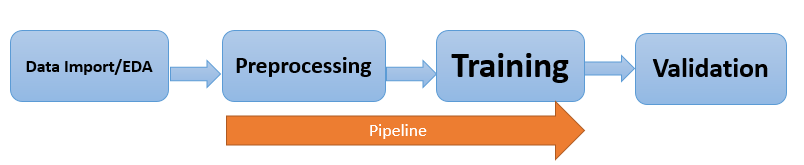

In [1]:
from IPython.display import Image
Image(filename='C:\\Users\\User\\Desktop\\capture.png') 

In [17]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Imporing packages and Data

In [19]:
#Importing Diabetes Data
DiabetesData = pd.read_csv("C:\\Users\\User\\Desktop\\pima-indians-diabetes.csv", header=None)

In [20]:
#Assigning column names
DiabetesData.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
                        "DiabetesPedigreeFunction","Age","Class"]

In [22]:
#viewing Data
DiabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
#Dividing Data in test and train
X_train,X_test,y_train,y_test=train_test_split(DiabetesData.iloc[:,[0,1,2,3,4,5,6,7]],DiabetesData.iloc[:,[8]],test_size=0.2,random_state=1)

# Creating pipelines 

In [8]:
## Creating pipelines for Logistic regression, Decision Tree and Random Forest models
#  Pipeline steps will include
## 1. Data Preprocessing using MinMax Scaler
## 2. Reducing Dimensionality using PCA
## 3. Training respective models

In [9]:
#Logistic Regression Pipeline
LogisticRegressionPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegression())])

In [10]:
#Decision tree Pipeline
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [11]:
#Random Forest Pipeline
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

# model training and validation

In [12]:
## Defining the pipelines in a list
mypipeline = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [38]:
#Defining variables for choosing best model
accuracy=0.0
classifier=0
pipeline=""

In [39]:
# Creating dictionary of pipelines and training models
PipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

# Fit the pipelines
for mypipe in mypipeline:
    mypipe.fit(X_train, y_train)

In [40]:
#getting test accuracy for all classifiers
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.7597402597402597
Decision Tree Test Accuracy: 0.7077922077922078
Random Forest Test Accuracy: 0.7467532467532467


In [41]:
#Choosing best model for the given data
for i,model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:Logistic Regression
